## This notebook will contain some simple visuals to get insights of the initial data. 

In [ ]:
%pip install seaborn

In [4]:
#Importing the necessary libraries
import sys
from pathlib import Path
import subprocess
from glob import glob
import matplotlib

import numpy as np
import pandas as pd
import polars as pl
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import math

import gc

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

dataPath = '/Users/artjolameli/Desktop/credit_risk_project/machine-learning-dse-i210-final-project-credit-risk/data/raw/parquet_files/train'

## Checking the size of the dataset

The following cell is used to check the size of each dataframe for both training set and test set. 
- The largest one in training set is *credit_bureau_a_2_5* which takes 2.9G 
- *applprev_1_2, credit_bureau_a_1_4, credit_bureau_a_2_11, static_0_2* are absent in the training set, so these df should not be included while training the model.

In [5]:
# Load and merge the files

train_basetable = pl.read_parquet(dataPath + "/train_base.parquet")

train_applprev_1_0 = pl.read_parquet(dataPath + "/train_applprev_1_0.parquet")
train_applprev_1_1 = pl.read_parquet(dataPath + "/train_applprev_1_1.parquet")
train_applprev_2 = pl.read_parquet(dataPath + "/train_applprev_2.parquet")
train_credit_bureau_a_1_0 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_0.parquet")
train_credit_bureau_a_1_1 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_1.parquet")
train_credit_bureau_a_1_2 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_2.parquet")
train_credit_bureau_a_1_3 = pl.read_parquet(dataPath + "/train_credit_bureau_a_1_3.parquet")
train_credit_bureau_a_2_0 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_0.parquet")
train_credit_bureau_a_2_1 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_1.parquet")
train_credit_bureau_a_2_2 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_2.parquet")
train_credit_bureau_a_2_3 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_3.parquet")
train_credit_bureau_a_2_4 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_4.parquet")
train_credit_bureau_a_2_5 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_5.parquet")
train_credit_bureau_a_2_6 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_6.parquet")
train_credit_bureau_a_2_7 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_7.parquet")
train_credit_bureau_a_2_8 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_8.parquet")
train_credit_bureau_a_2_9 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_9.parquet")
train_credit_bureau_a_2_10 = pl.read_parquet(dataPath + "/train_credit_bureau_a_2_10.parquet")
train_credit_bureau_b_1 = pl.read_parquet(dataPath + "/train_credit_bureau_b_1.parquet")
train_credit_bureau_b_2 = pl.read_parquet(dataPath + "/train_credit_bureau_b_2.parquet")
train_debitcard_1 = pl.read_parquet(dataPath + "/train_debitcard_1.parquet")
train_deposit_1 = pl.read_parquet(dataPath + "/train_deposit_1.parquet")
train_other_1 = pl.read_parquet(dataPath + "/train_other_1.parquet")
train_person_1 = pl.read_parquet(dataPath + "/train_person_1.parquet")
train_person_2 = pl.read_parquet(dataPath + "/train_person_2.parquet")
train_static_0_0 = pl.read_parquet(dataPath + "/train_static_0_0.parquet")
train_static_0_1 = pl.read_parquet(dataPath + "/train_static_0_1.parquet")
train_static_cb_0 = pl.read_parquet(dataPath + "/train_static_cb_0.parquet")
train_tax_registry_a_1 = pl.read_parquet(dataPath + "/train_tax_registry_a_1.parquet")
train_tax_registry_b_1 = pl.read_parquet(dataPath + "/train_tax_registry_b_1.parquet")
train_tax_registry_c_1 = pl.read_parquet(dataPath + "/train_tax_registry_c_1.parquet")

In [7]:
# Overview and statistics for each DataFrame
dataframes = {
    'train_applprev_1_0': train_applprev_1_0,
    'train_applprev_1_1': train_applprev_1_1,
    'train_applprev_2': train_applprev_2,
    'train_credit_bureau_a_1_0': train_credit_bureau_a_1_0,
    'train_credit_bureau_a_1_1': train_credit_bureau_a_1_1,
    'train_credit_bureau_a_1_2': train_credit_bureau_a_1_2,
    'train_credit_bureau_a_1_3': train_credit_bureau_a_1_3,
    'train_credit_bureau_a_2_0': train_credit_bureau_a_2_0,
    'train_credit_bureau_a_2_1': train_credit_bureau_a_2_1,
    'train_credit_bureau_a_2_2': train_credit_bureau_a_2_2,
    'train_credit_bureau_a_2_3': train_credit_bureau_a_2_3,
    'train_credit_bureau_a_2_4': train_credit_bureau_a_2_4,
    'train_credit_bureau_a_2_5': train_credit_bureau_a_2_5,
    'train_credit_bureau_a_2_6': train_credit_bureau_a_2_6,
    'train_credit_bureau_a_2_7': train_credit_bureau_a_2_7,
    'train_credit_bureau_a_2_8': train_credit_bureau_a_2_8,
    'train_credit_bureau_a_2_9': train_credit_bureau_a_2_9,
    'train_credit_bureau_a_2_10': train_credit_bureau_a_2_10,
    'train_credit_bureau_b_1': train_credit_bureau_b_1,
    'train_credit_bureau_b_2': train_credit_bureau_b_2,
    'train_debitcard_1': train_debitcard_1,
    'train_deposit_1': train_deposit_1,
    'train_person_1': train_person_1,
    'train_person_2': train_person_2,
    'train_static_0_0': train_static_0_0,
    'train_static_0_1': train_static_0_1,
    'train_static_cb_0': train_static_cb_0,
    'train_tax_registry_a_1': train_tax_registry_a_1,
    'train_tax_registry_b_1': train_tax_registry_b_1,
    'train_tax_registry_c_1': train_tax_registry_c_1
}

In [8]:
for name, df in dataframes.items():
    print(f"Overview of {name}:")
    # Print the schema for an overview of the DataFrame structure
    print(df.schema)
    
    # Get a summary of the data
    print(df.describe())

    print("\nMissing values count in each column:")
    # Count missing values in each column
    missing_values = df.select([pl.col(column).is_null().sum().alias(column) for column in df.columns])
    print(missing_values)

    print("\n-----\n")

Overview of train_applprev_1_0:
OrderedDict([('case_id', Int64), ('actualdpd_943P', Float64), ('annuity_853A', Float64), ('approvaldate_319D', String), ('byoccupationinc_3656910L', Float64), ('cancelreason_3545846M', String), ('childnum_21L', Float64), ('creationdate_885D', String), ('credacc_actualbalance_314A', Float64), ('credacc_credlmt_575A', Float64), ('credacc_maxhisbal_375A', Float64), ('credacc_minhisbal_90A', Float64), ('credacc_status_367L', String), ('credacc_transactions_402L', Float64), ('credamount_590A', Float64), ('credtype_587L', String), ('currdebt_94A', Float64), ('dateactivated_425D', String), ('district_544M', String), ('downpmt_134A', Float64), ('dtlastpmt_581D', String), ('dtlastpmtallstes_3545839D', String), ('education_1138M', String), ('employedfrom_700D', String), ('familystate_726L', String), ('firstnonzeroinstldate_307D', String), ('inittransactioncode_279L', String), ('isbidproduct_390L', Boolean), ('isdebitcard_527L', Boolean), ('mainoccupationinc_437A',

## Basetable 
##### Basetable stores the basic information about the observation and case_id. This is a unique identification of every observation and it is needed to use it to join the other tables to base tables.

In [9]:
train_basetable.head()

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1


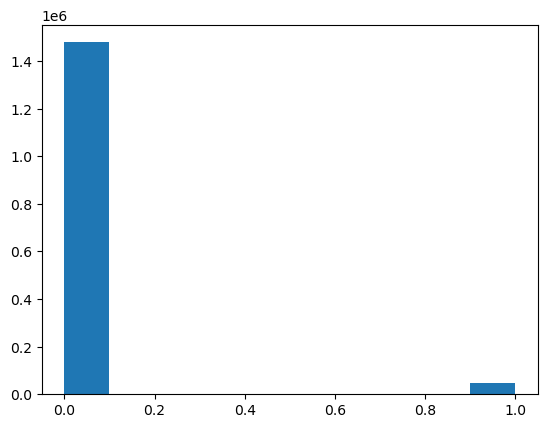

In [10]:
plt.hist(train_basetable['target'])
plt.show()

In [11]:
zeroes_ratio = train_basetable.filter(pl.col('target') == False).count()['target'][0] / train_basetable.shape[0]
zeroes_ratio

0.9685627242232876

This means that zero lines should be given less weight during training.

In [12]:
train_basetable = train_basetable.with_columns(
    date_decision_upd=pl.col("date_decision").str.to_datetime()
)

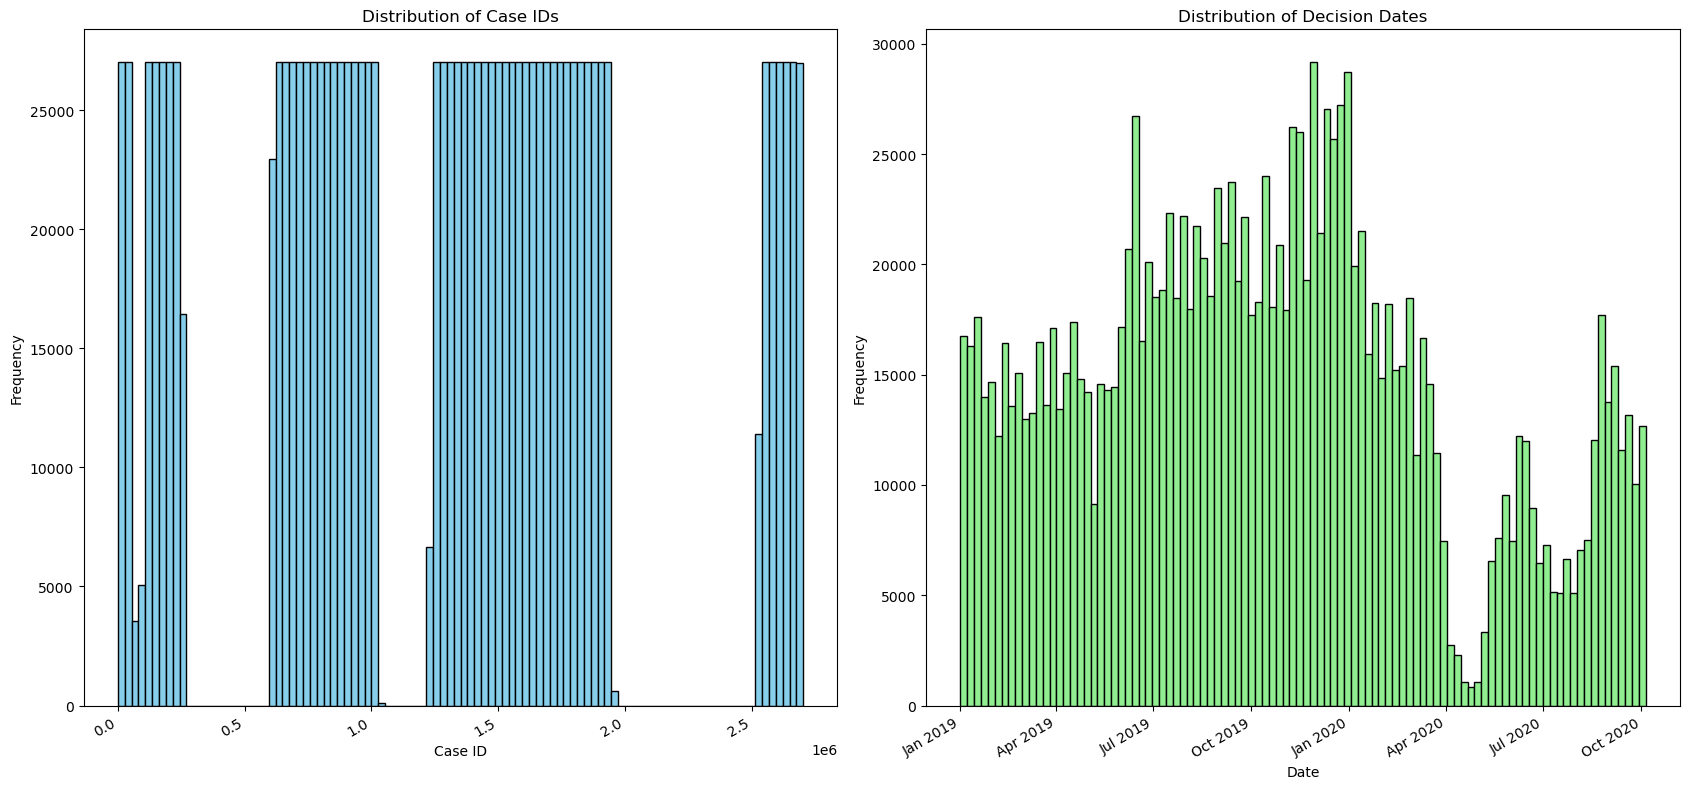

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))

# Histogram for 'case_id'
axes[0].hist(train_basetable['case_id'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Case IDs')  # Title for the first subplot
axes[0].set_xlabel('Case ID')  # X-axis label for the first subplot
axes[0].set_ylabel('Frequency')  # Y-axis label for the first subplot

# Histogram for 'date_decision_upd'
axes[1].hist(train_basetable['date_decision_upd'], bins=100, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Decision Dates')  # Title for the second subplot
axes[1].set_xlabel('Date')  # X-axis label for the second subplot
axes[1].set_ylabel('Frequency')  # Y-axis label for the second subplot

# Formatting the date on the x-axis of the second subplot
axes[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
fig.autofmt_xdate()  # Auto format the date labels to prevent overlap

plt.tight_layout()  # Adjust the layout to make room for all elements
plt.show()

The first histogram shows the frequency of different Case IDs in your dataset. The x-axis represents ranges of Case IDs, and the y-axis represents the frequency of those IDs within the dataset. The distribution appears uniform in certain ranges but has noticeable gaps. This might suggest that certain Case IDs are missing or that the allocation of Case IDs isn't continuous. These gaps or unusual distributions could be due to data entry errors, data processing, or how the Case IDs are assigned.

Second histogram shows the frequency of decision-making over a span from January 2019 to October 2020. Each bar represents the count of decisions made in a specific month. There is a significant decline in April 2020, which coincides with the early impacts of the COVID-19 pandemic—a relevant observation as many industries saw disruptions during this period. This drop might reflect delays in decision processes or a reduced number of cases being processed.

#### Target
Target is defined as whether or not the client defaulted on the specific credit case.
As we can see are are dealing with a highly imbalanced dataset

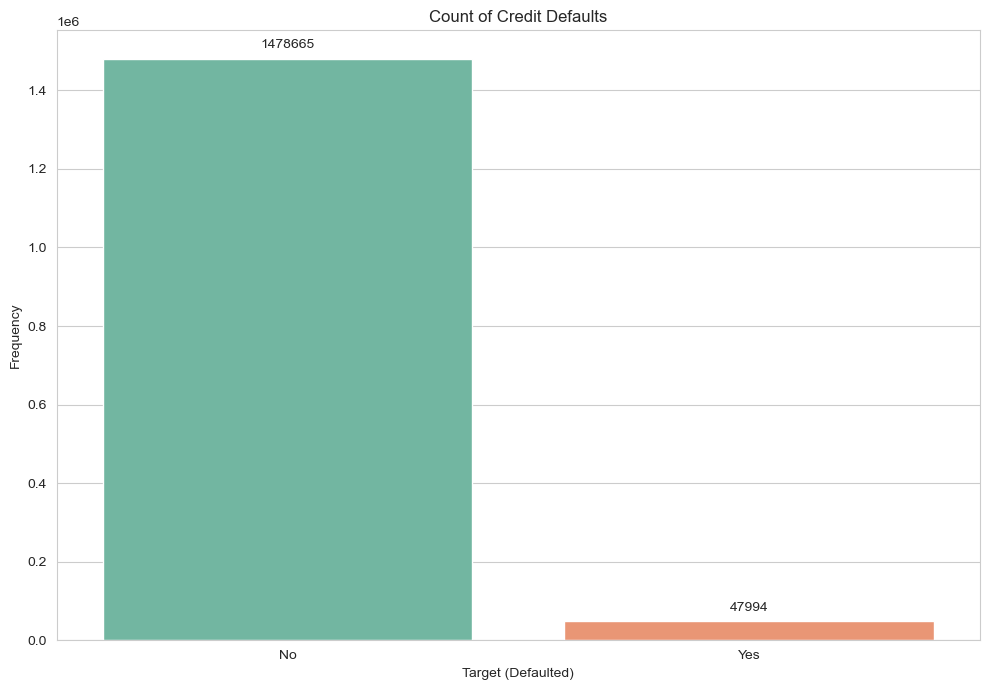

In [27]:
# Create a figure with specific size
plt.figure(figsize=(10, 7))

# Create a count plot for the 'target' column
ax = sns.countplot(data=train_basetable, x='target', palette="Set2")

# Add annotations on top of each bar in the plot
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting titles and labels
ax.set_title('Count of Credit Defaults')  # Add a title
ax.set_xlabel('Target (Defaulted)')  # X-axis label
ax.set_ylabel('Frequency')  # Y-axis label
ax.set_xticklabels(['No', 'Yes'])  # Assuming 0 and 1 are coded as No and Yes respectively

plt.tight_layout()  # Adjust layout to fit all elements neatly
plt.show()

(0.0, 2000.0)

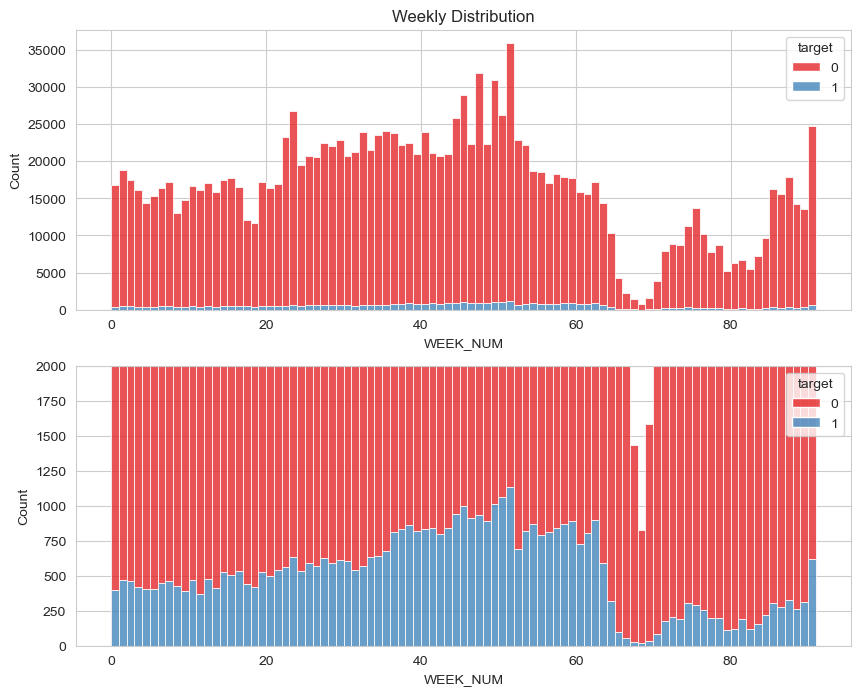

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=train_basetable, x='WEEK_NUM', hue="target", binwidth=1, multiple="stack", palette="Set1")
plt.title("Weekly Distribution")

plt.subplot(2,1,2)
sns.histplot(data=train_basetable, x='WEEK_NUM', hue="target", binwidth=1, multiple="stack", palette="Set1")
plt.ylim(0,2000)

### Insights and Observations:
Volume Trends: There appear to be fluctuations in the count of both categories over different weeks. Notably, there is a significant increase in the count of both categories around specific weeks, such as near the 60th week and the last few weeks shown.
Proportion of Categories: The distribution suggests that category 0 consistently has a higher volume than category 1 across most weeks.
Peaks and Valleys: Both plots show peaks and valleys indicating variability in counts over time, which might be influenced by external factors not shown in the graph (seasonality, promotions, etc.).

## Personal Data

#### Lets get a glimpse of the personal data and build some visualizations

In [25]:
train_person_1.head()

case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,empl_employedtotal_800L,empl_industry_691L,empladdr_district_926M,empladdr_zipcode_114M,familystate_447L,gender_992L,housetype_905L,housingtype_772L,incometype_1044T,isreference_387L,language1_981M,mainoccupationinc_384A,maritalst_703L,num_group1,personindex_1023L,persontype_1072L,persontype_792L,registaddr_district_1083M,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
i64,str,str,f64,str,bool,bool,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,f64,str,i64,f64,f64,f64,str,str,str,str,bool,str,str,bool,str,str
0,"""1986-07-01""",null,null,"""P88_18_84""",false,false,"""P167_100_165""","""P97_36_170""","""2017-09-15""","""MORE_FIVE""","""OTHER""","""P142_57_166""","""P167_100_165""","""MARRIED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10800.0,null,0,0.0,1.0,1.0,"""P88_18_84""","""P167_100_165""",null,null,null,"""CL""",null,true,"""F""","""PRIMARY_MOBILE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,1,1.0,1.0,4.0,"""a55475b1""","""a55475b1""","""SPOUSE""",null,false,"""EM""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,2,2.0,4.0,5.0,"""a55475b1""","""a55475b1""","""COLLEAGUE""","""SPOUSE""",false,"""PE""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,3,null,5.0,null,"""a55475b1""","""a55475b1""",null,"""COLLEAGUE""",null,"""PE""",null,null,null,"""PHONE"""
1,"""1957-08-01""",null,null,"""P103_93_94""",false,false,"""P176_37_166""","""P97_36_170""","""2008-10-29""","""MORE_FIVE""","""OTHER""","""P49_46_174""","""P160_59_140""","""DIVORCED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10000.0,null,0,0.0,1.0,1.0,"""P103_93_94""","""P176_37_166""",null,null,null,"""CL""",null,true,"""M""","""PRIMARY_MOBILE"""


In [26]:
train_person_1.describe()

statistic,case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,empl_employedtotal_800L,empl_industry_691L,empladdr_district_926M,empladdr_zipcode_114M,familystate_447L,gender_992L,housetype_905L,housingtype_772L,incometype_1044T,isreference_387L,language1_981M,mainoccupationinc_384A,maritalst_703L,num_group1,personindex_1023L,persontype_1072L,persontype_792L,registaddr_district_1083M,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
str,f64,str,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,f64,str,f64,f64,f64,f64,str,str,str,str,f64,str,str,f64,str,str
"""count""",2.973991e6,"""1526659""","""24916""",9907.0,"""2973991""",1.526218e6,1.526218e6,"""2973991""","""2973991""","""566701""","""528315""","""522236""","""2973991""","""2973991""","""728613""","""24916""","""100818""","""9815""","""1526659""",24916.0,"""2973991""",1.526659e6,"""11345""",2.973991e6,2.331708e6,2.967874e6,2.331708e6,"""2973991""","""2973991""","""805049""","""805942""",805049.0,"""2967874""","""24916""",1.526657e6,"""1526659""","""2967874"""
"""null_count""",0.0,"""1447332""","""2949075""",2.964084e6,"""0""",1.447773e6,1.447773e6,"""0""","""0""","""2407290""","""2445676""","""2451755""","""0""","""0""","""2245378""","""2949075""","""2873173""","""2964176""","""1447332""",2.949075e6,"""0""",1.447332e6,"""2962646""",0.0,642283.0,6117.0,642283.0,"""0""","""0""","""2168942""","""2168049""",2.168942e6,"""6117""","""2949075""",1.447334e6,"""1447332""","""6117"""
"""mean""",1.0552e6,null,null,0.616029,null,0.0,0.004542,null,null,null,null,null,null,null,null,null,null,null,null,0.5,null,57707.483462,null,0.796532,0.438357,2.034862,2.315691,null,null,null,null,0.0,null,null,0.946555,null,null
"""std""",724571.385118,null,null,0.96608,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,33348.302845,null,0.977789,0.659662,1.707171,1.826378,null,null,null,null,null,null,null,null,null,null
"""min""",0.0,"""1943-03-01""","""1911-12-01""",0.0,"""P0_111_121""",0.0,0.0,"""P0_101_75""","""P106_81_188""","""1963-06-15""","""LESS_ONE""","""AGRICULTURE""","""P0_140_162""","""P0_101_75""","""DIVORCED""","""F""","""COMPANY_FLAT""","""COMPANY_FLAT""","""EMPLOYED""",0.0,"""P10_39_147""",0.0,"""DIVORCED""",0.0,0.0,1.0,1.0,"""P0_111_121""","""P0_101_75""","""CHILD""","""CHILD""",0.0,"""CL""","""FULL""",0.0,"""F""","""ALTERNATIVE_PHONE"""
"""25%""",637354.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,36000.0,null,0.0,0.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null
"""50%""",890817.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,50000.0,null,0.0,0.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null
"""75%""",1.568334e6,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,70000.0,null,1.0,1.0,4.0,5.0,null,null,null,null,null,null,null,null,null,null
"""max""",2.703454e6,"""1999-10-01""","""2015-12-01""",11.0,"""a55475b1""",0.0,1.0,"""a55475b1""","""a55475b1""","""2020-09-15""","""MORE_ONE""","""WELNESS""","""a55475b1""","""a55475b1""","""WIDOWED""","""M""","""STATE_FLAT""","""STATE_FLAT""","""SELFEMPLOYED""",1.0,"""a55475b1""",200000.0,"""WIDOWED""",9.0,6.0,5.0,5.0,"""a55475b1""","""a55475b1""","""SPOUSE""","""SPOUSE""",0.0,"""PE""","""FULL""",1.0,"""M""","""WHATSAPP"""


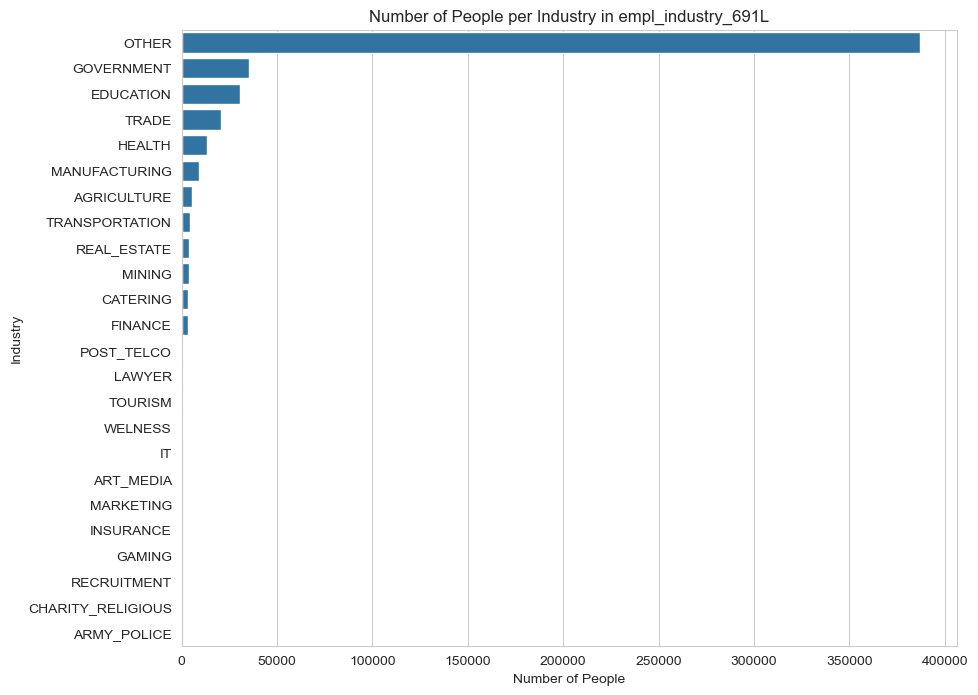

In [27]:
# Count the number of occurrences for each industry
industry_counts = train_person_1.groupby('empl_industry_691L').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
industry_counts_df = industry_counts.to_pandas()

# Sorting the data for better visualization
industry_counts_df = industry_counts_df.sort_values(by='count', ascending=False)

# Plotting using seaborn for a cleaner interface
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.barplot(data=industry_counts_df, x='count', y='empl_industry_691L')
plt.title('Number of People per Industry in empl_industry_691L')
plt.xlabel('Number of People')
plt.ylabel('Industry')
plt.show()

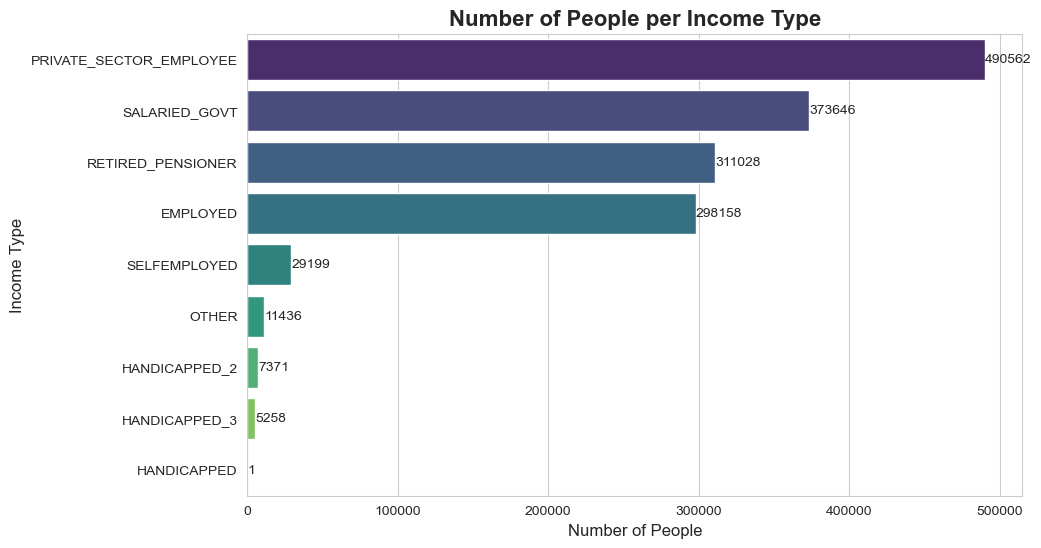

In [25]:
# Count the number of occurrences for each industry
income_type = train_person_1.groupby('incometype_1044T').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
income_type_df = income_type.to_pandas()

# Sorting the data for better visualization
income_type_df = income_type_df.sort_values(by='count', ascending=False)

# Setting the aesthetic style for the plots
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Setting a larger figure size for better readability
ax = sns.barplot(data=income_type_df, x='count', y='incometype_1044T', palette='viridis')

# Adding title and labels with additional styling
ax.set_title('Number of People per Income Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of People', fontsize=12)
ax.set_ylabel('Income Type', fontsize=12)

# Enhancing the display of data values on the bars
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2,  # Position text at end of bar
             f'{int(width)}',  # Text to display
             va='center')  # Center text vertically

plt.show()

In [24]:
train_person_2.head()

case_id,addres_district_368M,addres_role_871L,addres_zip_823M,conts_role_79M,empls_economicalst_849M,empls_employedfrom_796D,empls_employer_name_740M,num_group1,num_group2,relatedpersons_role_762T
i64,str,str,str,str,str,str,str,i64,i64,str
5,"""a55475b1""",null,"""a55475b1""","""a55475b1""","""a55475b1""",null,"""a55475b1""",0,0,null
6,"""P55_110_32""","""CONTACT""","""P10_68_40""","""P38_92_157""","""P164_110_33""",null,"""a55475b1""",0,0,null
6,"""P55_110_32""","""PERMANENT""","""P10_68_40""","""a55475b1""","""a55475b1""",null,"""a55475b1""",0,1,null
6,"""P204_92_178""","""CONTACT""","""P65_136_169""","""P38_92_157""","""P164_110_33""",null,"""a55475b1""",1,0,"""OTHER_RELATIVE"""
6,"""P191_109_75""","""CONTACT""","""P10_68_40""","""P7_147_157""","""a55475b1""",null,"""a55475b1""",1,1,"""OTHER_RELATIVE"""


Distributions of Address Roles

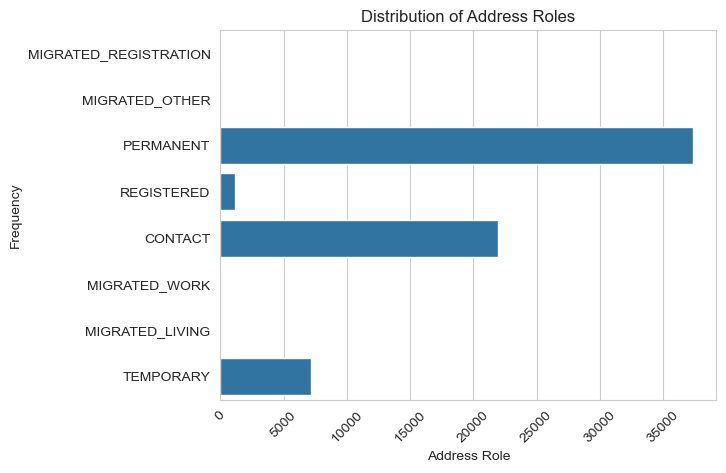

In [30]:
# Count the number of occurrences for each address
address_role = train_person_2.groupby('addres_role_871L').agg(pl.count().alias('count'))

# Convert to Pandas DataFrame for easier plotting
address_role_counts = address_role.to_pandas()

sns.barplot(data=address_role_counts, x='count', y='addres_role_871L')
plt.xlabel('Address Role')
plt.ylabel('Frequency')
plt.title('Distribution of Address Roles')
plt.xticks(rotation=45)
plt.show()

## Tax Registry Files

Included:
train_tax_registry_a_1
train_tax_registry_b_1
train_tax_registry_c_1

In [31]:
train_tax_registry_a_1.head()

case_id,amount_4527230A,name_4527232M,num_group1,recorddate_4527225D
i64,f64,str,i64,str
28631,711.0,"""f980a1ea""",3,"""2019-09-13"""
28631,1946.0,"""f980a1ea""",2,"""2019-09-13"""
28631,2600.0,"""f980a1ea""",1,"""2019-09-13"""
28631,3616.4001,"""f980a1ea""",0,"""2019-09-13"""
28632,400.0,"""5f9b74f5""",6,"""2019-09-13"""


In [32]:
train_tax_registry_b_1.head()

case_id,amount_4917619A,deductiondate_4917603D,name_4917606M,num_group1
i64,f64,str,str,i64
49435,6885.0,"""2019-10-16""","""6b730375""",0
49435,6885.0,"""2019-10-16""","""6b730375""",1
49435,6885.0,"""2019-10-16""","""6b730375""",2
49435,6885.0,"""2019-10-16""","""6b730375""",3
49435,6885.0,"""2019-10-16""","""6b730375""",4


In [33]:
train_tax_registry_c_1.head()

case_id,employername_160M,num_group1,pmtamount_36A,processingdate_168D
i64,str,i64,f64,str
357,"""c91b12ff""",0,1200.0,"""2019-01-04"""
357,"""c91b12ff""",1,1200.0,"""2018-11-28"""
357,"""c91b12ff""",2,972.8,"""2018-11-01"""
357,"""c91b12ff""",3,628.60004,"""2018-10-08"""
357,"""c91b12ff""",4,1200.0,"""2018-09-10"""


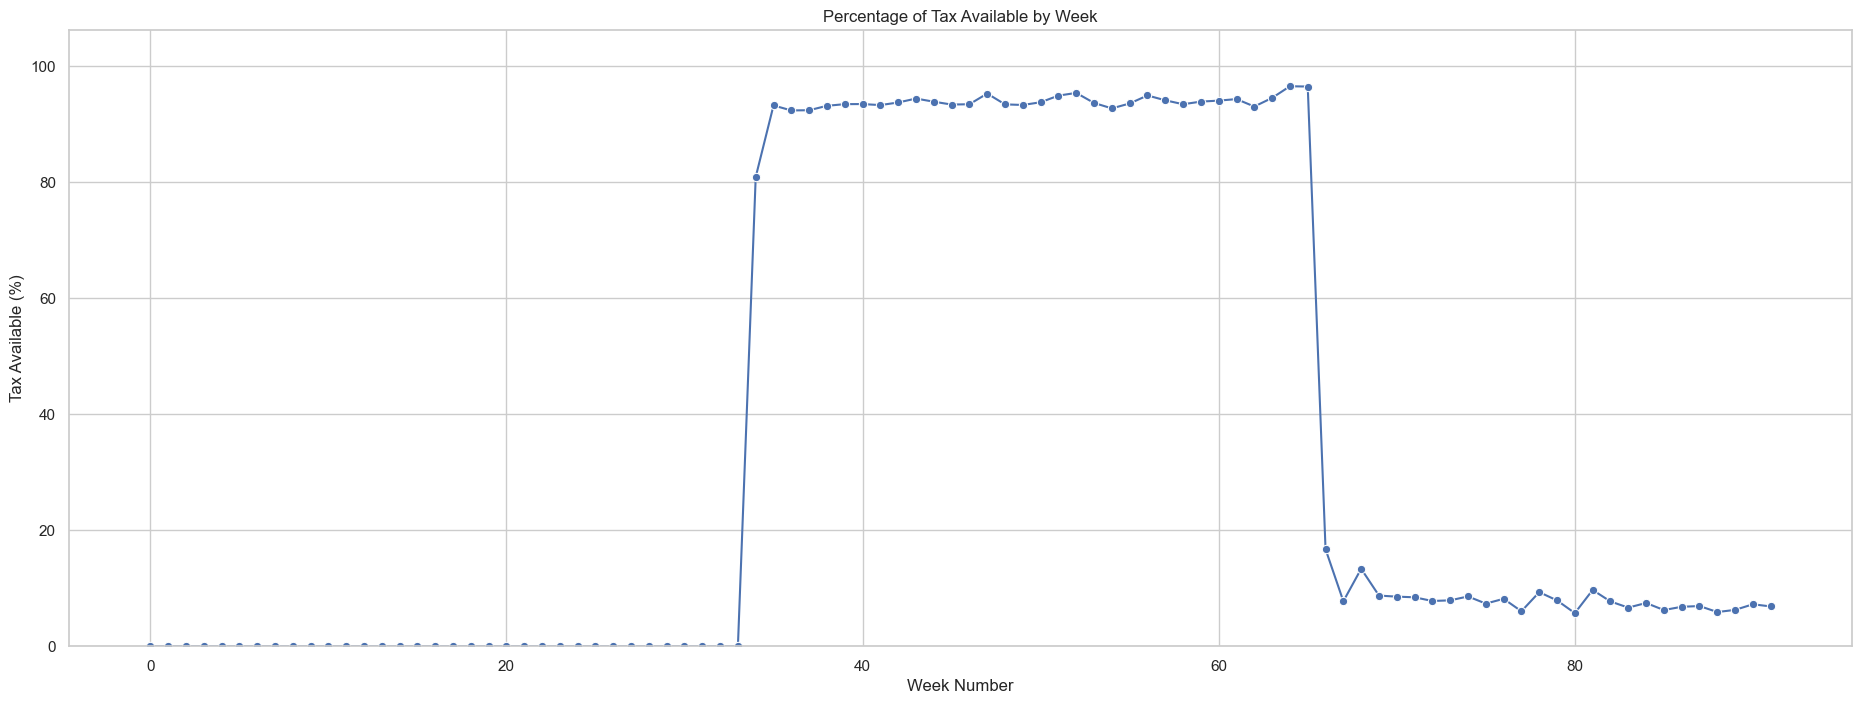

In [34]:
tax_df_a = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_a_1, how="left", on="case_id"
).to_pandas()

# Get number of entries by week
tax_df_grouped_a = tax_df_a.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

# Calculating the percentage of tax_available as of n_cases
tax_df_grouped_a["tax_available"] = (
    tax_df_grouped_a["amount_4527230A"] / tax_df_grouped_a["n_cases"]
) * 100

sns.set(style="whitegrid")

# Plotting directly using seaborn for a line plot
plt.figure(figsize=(23, 8)) 
sns.lineplot(data=tax_df_grouped_a, x='WEEK_NUM', y='tax_available', marker='o') 

# Adding title and labels
plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

plt.ylim(0, tax_df_grouped_a['tax_available'].max() * 1.1)

# Display the plot
plt.show()

### Onservations:

 System Change or Data Capture Anomaly: The sharp transitions suggest a possible system change or anomaly in data capture or reporting. For example, this could indicate the introduction of a new tax recording system that was online between weeks 20 and 60 and then either was discontinued or failed.

Analysis Use Case: For predictive modeling or trend analysis, the data from weeks 20 to 60 might be considered reliable, whereas data outside this range might require scrutiny or different analytical approaches.

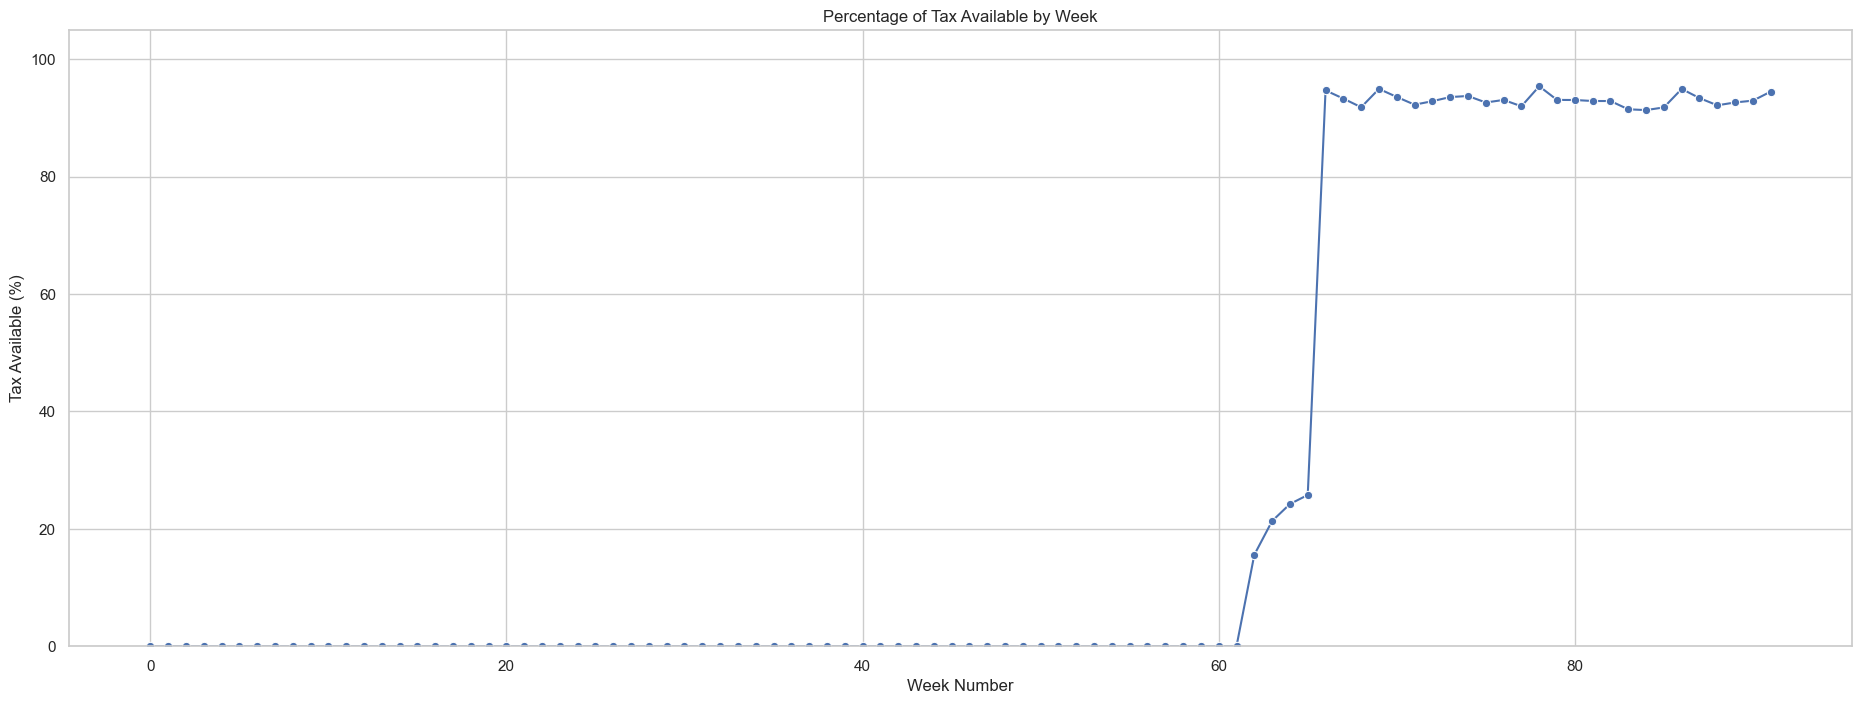

In [35]:
# Ensure that both dataframes are Polars DataFrames
if isinstance(train_basetable, pd.DataFrame):
    train_basetable = pl.from_pandas(train_basetable)
if isinstance(train_tax_registry_b_1, pd.DataFrame):
    train_tax_registry_b_1 = pl.from_pandas(train_tax_registry_b_1)

# Now perform the join
tax_df_b = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_b_1, how="left", on="case_id"
).to_pandas()

# Continue with your code
tax_df_grouped_b = tax_df_b.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

tax_df_grouped_b["tax_available"] = (
    tax_df_grouped_b["amount_4917619A"] / tax_df_grouped_b["n_cases"]
) * 100

sns.set(style="whitegrid")

plt.figure(figsize=(23, 8))  
sns.lineplot(data=tax_df_grouped_b, x='WEEK_NUM', y='tax_available', marker='o')

plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

plt.ylim(0, tax_df_grouped_b['tax_available'].max() * 1.1)  

plt.show()

### Observations:

Improvements in Data Capture Systems: The gradual increase leading to a stable high availability suggests a phased implementation or gradual improvement in the tax data capture systems.
Potential for Reliable Historical Analysis: Data from week 60 onwards might be more reliable for historical analysis.

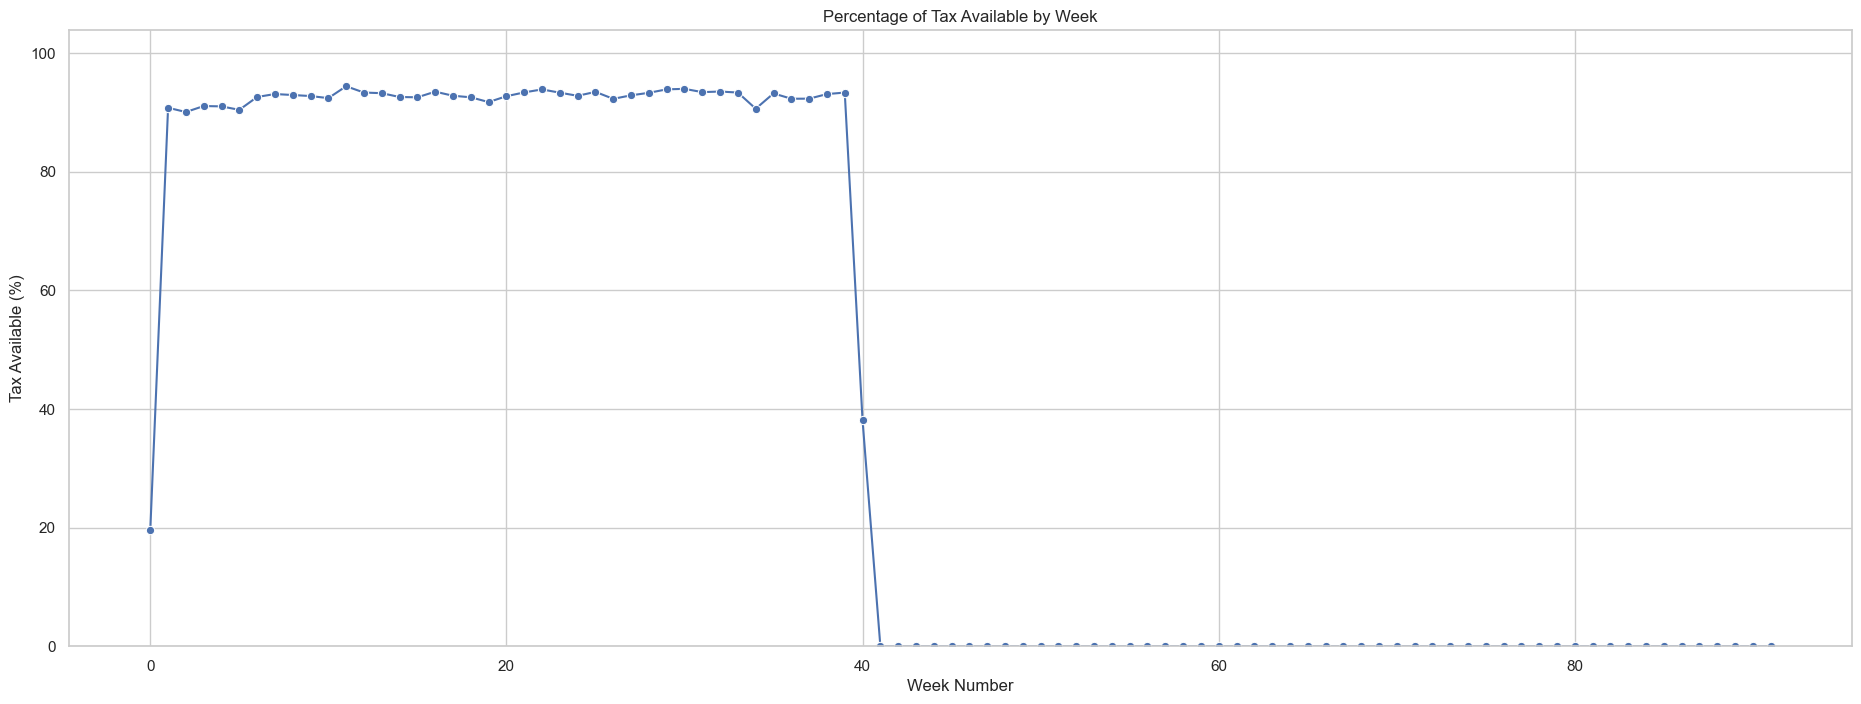

In [36]:
tax_df_c = train_basetable.select(["case_id", "WEEK_NUM"]).join(
    train_tax_registry_c_1, how="left", on="case_id"
).to_pandas()

# Get number of entries by week
tax_df_grouped_c = tax_df_c.groupby(
    "WEEK_NUM", as_index=False
).count().rename(columns={"case_id": "n_cases"})

# Calculating the percentage of tax_available as of n_cases
tax_df_grouped_c["tax_available"] = (
    tax_df_grouped_c["pmtamount_36A"] / tax_df_grouped_c["n_cases"]
) * 100

sns.set(style="whitegrid")

# Plotting directly using seaborn for a line plot
plt.figure(figsize=(23, 8)) 
sns.lineplot(data=tax_df_grouped_c, x='WEEK_NUM', y='tax_available', marker='o') 

# Adding title and labels
plt.title('Percentage of Tax Available by Week')
plt.xlabel('Week Number')
plt.ylabel('Tax Available (%)')

plt.ylim(0, tax_df_grouped_c['tax_available'].max() * 1.1)  

# Display the plot
plt.show()

### Observations:

Implementation of Data Collection Systems: The abrupt transition from zero to full availability and back suggests periods of transition in the system used to collect or report the tax data. It's possible that a new system or process was implemented around week 20, became fully operational, and then ceased or failed around week 40.

Investigation of Data Gaps: The periods of zero availability before week 20 and after week 40 raise concerns about data integrity and completeness. These gaps would need to be accounted for in any longitudinal analysis, requiring either data imputation or exclusion of these periods depending on the analysis' goal.
: